In [1]:
import numpy as np
from matplotlib import pylab as plt
from scipy import optimize
import math
%matplotlib inline

## 1. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. 

Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [2]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

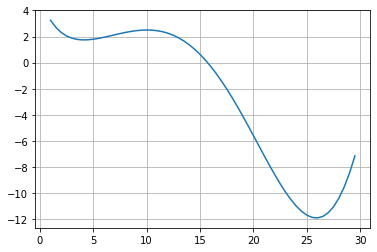

In [3]:
x = np.arange(1., 30., 0.5)

plt.plot(x, f(x))
plt.grid(True)
plt.show()

## 2. optimize.minimize.

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [4]:
optimize.minimize(f, 2, method = 'BFGS')

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

## 3. Теперь измените начальное приближение на x=30. 

Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [6]:
optimize.minimize(f, 30, method = 'BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

## 1. Поиск минимума.

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [7]:
optimize.differential_evolution(f, [(1, 30)])

     fun: array([-11.89889467])
     jac: array([2.84217094e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.8801979])

## 1. Функция h(x).

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [8]:
def h(x):
    return int(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

In [9]:
h_vect = np.vectorize(h)

## 2. Ступенчатый график.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

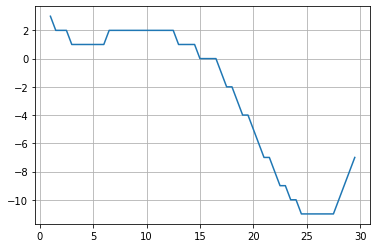

In [10]:
plt.plot(x, h_vect(x))
plt.grid(True)
plt.show()

## 3. Минимум функции h(x).

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30.

In [11]:
optimize.minimize(h, 30, method = 'BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

## 4. Дифференциальная революция.

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

In [12]:
optimize.differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.84036483])